<a href="https://colab.research.google.com/github/Skuerjuan/tp1_chona/blob/main/maierowicz_atanasoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 Seminario IA
# Maierowicz, Atanasoff       
---
## ¿Deberían aceptar darle el préstamo?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# importando la data y creando el pd.dataframe
data = "https://raw.githubusercontent.com/Skuerjuan/tp1_chona/refs/heads/main/loan_data.csv"
df = pd.read_csv(data)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
# ver todas las cosas que hay que encodear

categorical = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]

for col in categorical:
    print(col, df[col].unique())

person_gender ['female' 'male']
person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file ['No' 'Yes']


In [7]:
# encoding de todas las features categóricas

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("cat", OneHotEncoder(), categorical)], remainder="passthrough")

x = ct.fit_transform(df)

feature_names = ct.get_feature_names_out()

df = pd.DataFrame(x, columns=feature_names)
df.head()

,cat__person_gender_female,cat__person_gender_male,cat__person_education_Associate,cat__person_education_Bachelor,cat__person_education_Doctorate,cat__person_education_High School,cat__person_education_Master,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__previous_loan_defaults_on_file_Yes,remainder__person_age,remainder__person_income,remainder__person_emp_exp,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__credit_score,remainder__loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,22.0,71948.0,0.0,35000.0,16.02,0.49,3.0,561.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,21.0,12282.0,0.0,1000.0,11.14,0.08,2.0,504.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,25.0,12438.0,3.0,5500.0,12.87,0.44,3.0,635.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,79753.0,0.0,35000.0,15.23,0.44,2.0,675.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,24.0,66135.0,1.0,35000.0,14.27,0.53,4.0,586.0,1.0


In [8]:
for col in df.columns:
    print(col)

cat__person_gender_female
cat__person_gender_male
cat__person_education_Associate
cat__person_education_Bachelor
cat__person_education_Doctorate
cat__person_education_High School
cat__person_education_Master
cat__person_home_ownership_MORTGAGE
cat__person_home_ownership_OTHER
cat__person_home_ownership_OWN
cat__person_home_ownership_RENT
cat__loan_intent_DEBTCONSOLIDATION
cat__loan_intent_EDUCATION
cat__loan_intent_HOMEIMPROVEMENT
cat__loan_intent_MEDICAL
cat__loan_intent_PERSONAL
cat__loan_intent_VENTURE
cat__previous_loan_defaults_on_file_No
cat__previous_loan_defaults_on_file_Yes
remainder__person_age
remainder__person_income
remainder__person_emp_exp
remainder__loan_amnt
remainder__loan_int_rate
remainder__loan_percent_income
remainder__cb_person_cred_hist_length
remainder__credit_score
remainder__loan_status


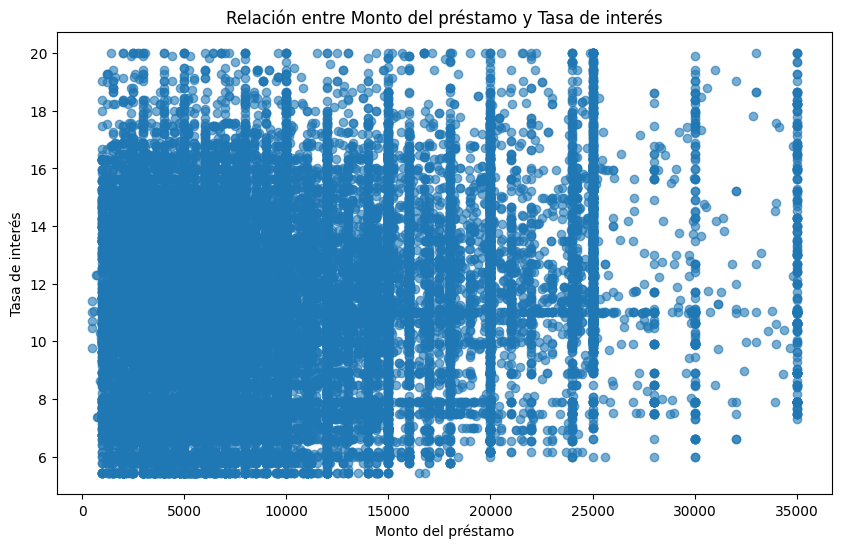

In [9]:
#graficos para analisis

plt.figure(figsize=(10, 6))
plt.scatter(df['remainder__loan_amnt'], df['remainder__loan_int_rate'], alpha=0.6)
plt.title("Relación entre Monto del préstamo y Tasa de interés")
plt.xlabel('Monto del préstamo')
plt.ylabel('Tasa de interés')
plt.show()


In [10]:
# Split del dataset

from sklearn.model_selection import train_test_split

y = df["remainder__loan_status"]
x = df.drop(columns=["remainder__loan_status"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Modelo con árboles

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, criterion="log_loss")
dtc.fit(x_train, y_train)

print(f'Train Score: {dtc.score(x_train, y_train)}')
print(f'Test Score: {dtc.score(x_test, y_test)}')

Train Score: 0.9110555555555555
Test Score: 0.9083333333333333
